# Assignment: Lab 01 - API Calls
## Krishu Wadhwa - euj7fh
## September 23, 2024

In [282]:
# imports 

import requests
import urllib.request
import streamlit as st
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Practice writing queries using the saferproducts.gov API and your web browser.**

In [283]:
# define the URL and query parameters
url = 'https://www.saferproducts.gov/RestWebServices/Recall' # Location of the API
query = '?format=json&ProductType=Exercise' # The query

# send API request and get response
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes) # Convert response to json
response.close()


**2. Practice with the saferproducts.gov API and the above code in a notebook to see how API's work, in general.**

In [284]:
# convert JSON to pandas

df = pd.DataFrame.from_dict(data)
print(df.shape) # shape
df.head() # first few rows

(91, 22)


,RecallID,RecallNumber,RecallDate,Description,URL,Title,ConsumerContact,LastPublishDate,Products,Inconjunctions,Images,Injuries,Manufacturers,Retailers,Importers,Distributors,SoldAtLabel,ManufacturerCountries,ProductUPCs,Hazards,Remedies,RemedyOptions
0,7832,16247,2016-08-23T00:00:00,"This recall involves ""Step-iT"" activity wristb...",https://www.cpsc.gov/Recalls/2016/McDonalds-Re...,McDonald’s Recalls “Step-iT” Activity Wristban...,McDonald's at 800-244-6227 from 7 a.m. to 7 p....,2016-08-23T00:00:00,"[{'Name': 'Step-iT Activity Wristbands', 'Desc...",[{'URL': 'http://healthycanadians.gc.ca/recall...,[{'URL': 'https://www.cpsc.gov/s3fs-public/CR0...,[{'Name': 'McDonald's has received more than 7...,[],[{'Name': 'Distributed exclusively by McDonald...,[],"[{'Name': 'McDonald's Corp., of Oakbrook, Ill....",None,[{'Country': 'China'}],[],[{'Name': 'The recalled wristbands can cause s...,[{'Name': 'Consumers should immediately take t...,[{'Option': 'Replace'}]
1,6724,16742,2016-05-10T00:00:00,This recall involves the Olympic Decline free ...,https://www.cpsc.gov/Recalls/2016/Cybex-Intern...,Cybex International Recalls Decline Free Weigh...,Cybex toll-free at 888-462-9239 from 8 a.m. to...,2016-05-10T00:00:00,"[{'Name': 'Decline free weight benches', 'Desc...",[],[{'URL': 'https://www.cpsc.gov/s3fs-public/Cyb...,[{'Name': 'The firm received 10 reports of fra...,"[{'Name': 'Cybex International, Inc. of Medway...",[{'Name': 'Cybex direct sales force or its dis...,[],[],None,[{'Country': 'United States'}],[],[{'Name': 'The frame on the bench can collapse...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Replace'}]
2,6488,15749,2015-08-25T00:00:00,This recall involves four models of exercise m...,https://www.cpsc.gov/Recalls/2015/Cybex-Intern...,Cybex International Recalls Arm Curl Machines ...,Cybex International toll-free at 888-678-3846 ...,2015-08-25T00:00:00,"[{'Name': 'Arm Curl Machines', 'Description': ...",[],[{'URL': 'https://www.cpsc.gov/s3fs-public/Rec...,[{'Name': 'The firm has received 108 reports o...,"[{'Name': 'Cybex International, Inc., of Medwa...",[{'Name': 'Cybex or its distributors directly ...,[],[],None,[{'Country': 'United States'}],[],[{'Name': 'The swivel handles can break off fr...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Repair'}]
3,6420,15735,2015-06-16T00:00:00,This recall involves the Rogue Fitness Mobilit...,https://www.cpsc.gov/Recalls/2015/Coulter-Vent...,Coulter Ventures Recalls MobilityWOD Door Anch...,Coulter toll-free at (844) 216-3846 from 9 a.m...,2015-06-16T00:00:00,"[{'Name': 'MobilityWOD Door Anchor', 'Descript...",[],[{'URL': 'https://www.cpsc.gov/s3fs-public/Rec...,[{'Name': 'The firm has received three reports...,[],[{'Name': 'Rogue Fitness websites: www.roguefi...,[],"[{'Name': 'Coulter Ventures LLC, dba Rogue Fit...",None,[{'Country': 'China'}],[],[{'Name': 'The nylon strap can pull out from t...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Refund'}]
4,6398,15140,2015-05-20T00:00:00,This recall involves Valor Fitness BF-38 Flat/...,https://www.cpsc.gov/Recalls/2015/Valor-Athlet...,Valor Athletics Recalls Olympic Weight Bench d...,Valor Fitness toll-free at (844) 277-1641 Mond...,2015-05-20T00:00:00,"[{'Name': 'Weight bench', 'Description': '', '...",[],[{'URL': 'https://www.cpsc.gov/s3fs-public/Rec...,[{'Name': 'None reported'}],[],[{'Name': 'Valorathleticsinc.com and Valorfitn...,"[{'Name': 'Valor Athletics Inc., of St. Peters...",[],None,[{'Country': 'China'}],[],[{'Name': 'The weld joining the front leg to t...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Repair'}]


In [285]:
df.columns # column names

Index(['RecallID', 'RecallNumber', 'RecallDate', 'Description', 'URL', 'Title',
       'ConsumerContact', 'LastPublishDate', 'Products', 'Inconjunctions',
       'Images', 'Injuries', 'Manufacturers', 'Retailers', 'Importers',
       'Distributors', 'SoldAtLabel', 'ManufacturerCountries', 'ProductUPCs',
       'Hazards', 'Remedies', 'RemedyOptions'],
      dtype='object')

In [286]:
df['RemedyOptions'].value_counts() # show value counts for 'RemedyOptions'

RemedyOptions
[]                                                        66
[{'Option': 'Repair'}]                                     9
[{'Option': 'Replace'}]                                    8
[{'Option': 'Refund'}]                                     5
[{'Option': 'Replace'}, {'Option': 'Refund'}]              1
[{'Option': 'Refund'}, {'Option': 'Repair'}]               1
[{'Option': 'New Instructions'}, {'Option': 'Repair'}]     1
Name: count, dtype: int64

In [287]:
# recursively collapse the dictionary entries into a single string

temp = df['RemedyOptions']
clean_values = []

for i in range(len(temp)): # loop through each row and flatten the 'RemedyOptions' column
    if len(temp[i]) > 0: # if there are values
        values = []
        for j in range(len(temp[i])):
            values.append(temp[i][j]['Option']) # append the 'Option' field values
        clean_values.append(values)
    else:
        clean_values.append('') # if empty append empty string
df['remedy'] = clean_values # add a column named remedy

In [288]:
df['remedy'].value_counts() # show counts for remedy

remedy
                              66
[Repair]                       9
[Replace]                      8
[Refund]                       5
[Replace, Refund]              1
[Refund, Repair]               1
[New Instructions, Repair]     1
Name: count, dtype: int64

**3. Convert this code chunk into a function you can reuse to flatten dictionaries, or explain clearly the problems you run into while attempting to do so. Make some tables or plots.**

In [289]:
def flatten(var): 
    #flatten column of dictionaries into list of values with specified key
    
    temp = df[var] # get column
    clean_values = [] # array for new values
    key = [*temp[0][0]][0] # dictionary key
    for i in range(len(temp)):
        if len(temp[i]) == 1 : # one entry in the valye
            clean_values.append(str(temp[i][0][key])) # convert to string and append
        elif len(temp[i]) > 1: # multiple entries in the value to flatten
            new_values = [] # list for flattened entries
            for j in range(len(temp[i])): # go through dictionary
                new_values.append(temp[i][j][key]) # append values for the key
            clean_values.append(str(new_values) ) # convert to string from list and append
        else:
            clean_values.append('') # missing values are blank
    return clean_values

In [290]:
df['remedy_flat'] = flatten('RemedyOptions') # test if flatten works
df['remedy_flat'].value_counts()

remedy_flat
                                  66
Repair                             9
Replace                            8
Refund                             5
['Replace', 'Refund']              1
['Refund', 'Repair']               1
['New Instructions', 'Repair']     1
Name: count, dtype: int64

**4. Produce your own table or plot.**

Plot for remedy options.

<function matplotlib.pyplot.show(close=None, block=None)>

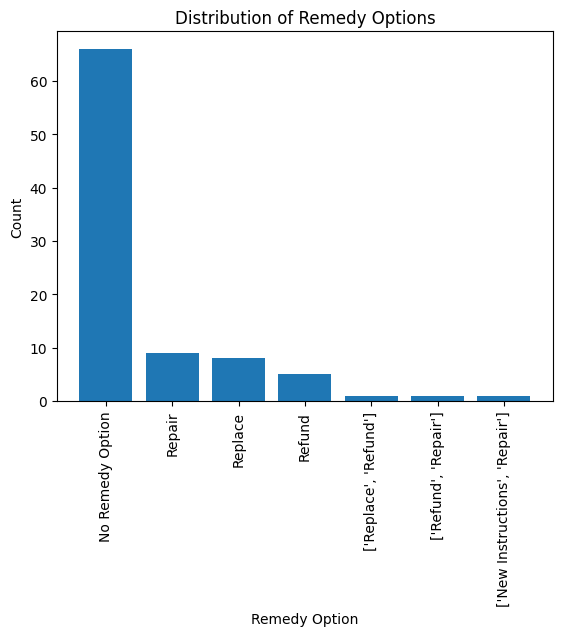

In [291]:
df['remedy'] = flatten('RemedyOptions')
df['remedy'] = df['remedy'].replace('', 'No Remedy Option') # for those with blanks, there is no remedy option so add this
remedy_count = df['remedy'].value_counts()

# x and y values
x = remedy_count.index
y = remedy_count.values

# create chart
plt.bar(x, y, width=0.8, align='center')

# title and label axes 
plt.title("Distribution of Remedy Options")
plt.xlabel("Remedy Option")
plt.ylabel("Count")

# adjust features
plt.xticks(rotation = 90)

# display 
plt.show

Plot for manufacturing countries.

<function matplotlib.pyplot.show(close=None, block=None)>

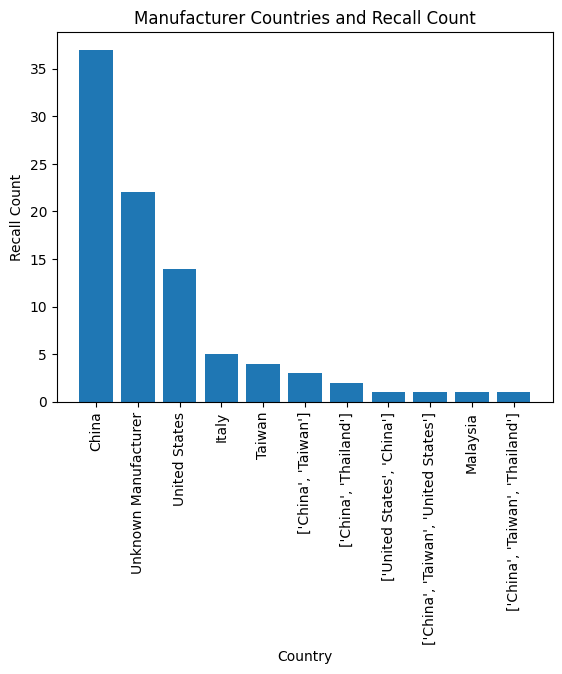

In [292]:
df['countries'] = flatten('ManufacturerCountries')
df['countries'] = df['countries'].replace('', 'Unknown Manufacturer') # for those with blanks, the manufacturing country is unknown
country_count = df['countries'].value_counts()

x = country_count.index
y = country_count.values

# create chart
plt.bar(x, y, width=0.8, align='center')

# title and label axes 
plt.title("Manufacturer Countries and Recall Count")
plt.xlabel("Country")
plt.ylabel("Recall Count")

# adjust features
plt.xticks(rotation = 90)

# display 
plt.show

Table with Manufacturing Countries and their Remedy Options

In [293]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.crosstab(df['remedy'],df['countries'])

countries,China,Italy,Malaysia,Taiwan,United States,Unknown Manufacturer,"['China', 'Taiwan', 'Thailand']","['China', 'Taiwan', 'United States']","['China', 'Taiwan']","['China', 'Thailand']","['United States', 'China']"
remedy,,,,,,,,,,,
No Remedy Option,22,5,1,2,8,22,1,1,2,2,0
Refund,5,0,0,0,0,0,0,0,0,0,0
Repair,2,0,0,2,5,0,0,0,0,0,0
Replace,5,0,0,0,1,0,0,0,1,0,1
"['New Instructions', 'Repair']",1,0,0,0,0,0,0,0,0,0,0
"['Refund', 'Repair']",1,0,0,0,0,0,0,0,0,0,0
"['Replace', 'Refund']",1,0,0,0,0,0,0,0,0,0,0


**5. Pick an API, download some data, wrangle them, and produce some EDA results, as we did in the previous steps with the saferproducts.gov API; or, if you can't get it to work, document why. If you have the time and it's low cost, push the results to a streamlit page. If you have had enough, I recommend `https://www.eia.gov/opendata/browser/electricity`, since there is a friendly query builder that you can use to learn.**

In [294]:
url = 'https://api.eia.gov/v2/electricity/state-electricity-profiles/summary/data/' 
api_key = '?api_key=3P7bD9qL9aTI5GArPTcDHKf3sIFZI572a23jnF9g'
query = '&frequency=annual&data[0]=average-retail-price&data[1]=carbon-dioxide&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'

## Query the API:
response = urllib.request.urlopen(url+api_key+query)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close() 

## Convert results to dataframe:
df = pd.DataFrame.from_dict(data['response']['data'])
print(df.shape)
df.head()

(768, 7)


,period,stateID,stateDescription,average-retail-price,carbon-dioxide,average-retail-price-units,carbon-dioxide-units
0,2022,IL,Illinois,11.94,53796,cents per kilowatthour,thousand metric tons
1,2022,WY,Wyoming,8.24,38619,cents per kilowatthour,thousand metric tons
2,2022,WV,West Virginia,9.74,50376,cents per kilowatthour,thousand metric tons
3,2022,UT,Utah,8.8,26262,cents per kilowatthour,thousand metric tons
4,2022,NE,Nebraska,8.83,22174,cents per kilowatthour,thousand metric tons


### EDA

In [295]:
df.columns # view columns

Index(['period', 'stateID', 'stateDescription', 'average-retail-price',
       'carbon-dioxide', 'average-retail-price-units', 'carbon-dioxide-units'],
      dtype='object')

In [296]:
data['response']['description'] # get description of data

'State rankings for key electricity statistics by state\r\n    Source: Forms EIA-860, EIA-861, EIA-923\r\n    Product: State Electricity Profiles, Table 1'

In [297]:
df[['average-retail-price', 'carbon-dioxide']].describe() # get statistics

,average-retail-price,carbon-dioxide
count,768,768
unique,516,755
top,8.84,7
freq,6,3


In [298]:
df['average-retail-price'].unique()

array(['11.94', '8.24', '9.74', '8.8', '8.83', '8.42', '9.97', '10.26',
       '12.04', '10.51', '11.66', '11.75', '11.95', '10.75', '12.36',
       '10.16', '19.3', '11.86', '10.64', '18.33', '10.94', '14.8', '9.6',
       '10.36', '13.2', '17.44', '21.27', '10.41', '12', '12.51', '11.83',
       '14.94', '21.08', '22.33', '11.31', '9.91', '11.59', '20.73',
       '9.05', '16.99', '9.26', '8.51', '39.72', '13.32', '10.89',
       '10.74', '21.07', '9.5', '8.25', '8.87', '11.01', '8.34', '9.79',
       '8.84', '8.65', '12.81', '9.85', '11.08', '12.93', '9.12', '10.9',
       '9.1', '13.96', '19.06', '8.82', '10.43', '10.67', '10.5', '18.32',
       '19.65', '10.73', '10.18', '20.02', '9.14', '11.1', '18.44',
       '8.52', '9.76', '8.17', '8.75', '16.34', '8.95', '30.31', '11.48',
       '10.14', '9.78', '9.96', '17.37', '16.11', '8.58', '14.01', '9.29',
       '9.75', '9.33', '8.97', '8.53', '9.64', '9.92', '10.27', '11.9',
       '8.27', '10.82', '9.16', '10.59', '8.36', '18.54', '9.

In [299]:
df['carbon-dioxide'].unique()

array(['53796', '38619', '50376', '26262', '22174', '28813', '13656',
       '57147', '22327', '55012', '70490', '29739', '32978', '26093',
       '1650367', '213621', '2949', '77555', '71710', '30788', '13509',
       '15891', '41255', '27308', '58510', '2792', '9098', '48266',
       '43772', '97615', '2682', '64', '10757', '44448', '32948', '31303',
       '52252', '3592', '10787', '13', '7874', '2287', '6427', '11240',
       '26586', '24857', '2543', '25628', '36701', '57839', '36408',
       '29710', '17204', '21255', '27590', '12777', '112', '59653',
       '23176', '55045', '56157', '70434', '31128', '29586', '2285',
       '8388', '45917', '43566', '96324', '2464', '10940', '45075',
       '34275', '49610', '3557', '27575', '1651911', '206175', '3558',
       '79951', '27812', '68982', '2573', '11048', '11', '8710', '6429',
       '12040', '57167', '27107', '25193', '2261', '28355', '13899',
       '14786', '41244', '47512', '18656', '20950', '27415', '54133',
       '49750', 

In [300]:
price = df['average-retail-price']
co2 = df['carbon-dioxide']

price = pd.to_numeric(price, errors = 'coerce')
co2 = pd.to_numeric(co2, errors = 'coerce')

In [301]:
df.isnull().sum() # understand if there are any invalid data points

period                        0
stateID                       0
stateDescription              0
average-retail-price          0
carbon-dioxide                0
average-retail-price-units    0
carbon-dioxide-units          0
dtype: int64

In [302]:
df['period'].unique() # find years which data is present for

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2010', '2009', '2008'],
      dtype=object)

In [306]:
# CREATING THE AVERAGE TABLE

df['price'] = price
df['co2'] = co2

df['period'] = pd.to_datetime(df['period']) # convert to datetime
state_avg_table = df.groupby('stateDescription').agg({'price': 'mean', 'co2': 'mean'}).reset_index() # calculate means
state_avg_table.columns = ['State', 'Average Retail Price (cents/kWh)', 'Average Carbon Dioxide Emissions (thousand metric tons)'] # rename columns

price_avg = state_avg_table['Average Retail Price (cents/kWh)']
co2_avg = state_avg_table['Average Carbon Dioxide Emissions (thousand metric tons)']

state_avg_table



,State,Average Retail Price (cents/kWh),Average Carbon Dioxide Emissions (thousand metric tons)
0,Alabama,9.511333,6.272967e+04
1,Alaska,17.714667,3.790733e+03
2,Arizona,10.224000,4.764907e+04
3,Arkansas,8.082667,3.271660e+04
4,California,15.662000,5.092673e+04
5,Colorado,9.842667,3.641427e+04
6,Connecticut,17.734000,9.170133e+03
7,Delaware,11.201333,3.904933e+03
8,District of Columbia,12.528667,7.953333e+01
9,Florida,10.644667,1.087910e+05


Scatter Plot of Average Retail Price of Electricity (cents per kilowatt hour) vs. Carbon Dioxide Emissions (thousand metric tons)

<function matplotlib.pyplot.show(close=None, block=None)>

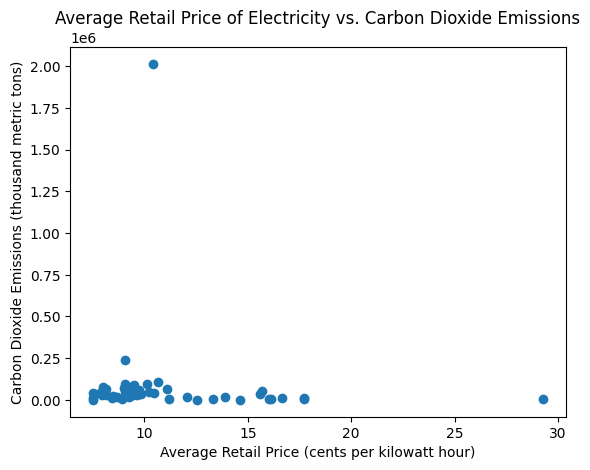

In [307]:
# create chart
plt.scatter(price_avg, co2_avg)

# title and label axes 
plt.title("Average Retail Price of Electricity vs. Carbon Dioxide Emissions")
plt.xlabel("Average Retail Price (cents per kilowatt hour)")
plt.ylabel("Carbon Dioxide Emissions (thousand metric tons)")

# display 
plt.show

Correlation Between Price and Emissions

In [308]:
correlation = price_avg.corr(co2_avg)
print(correlation)

-0.05952581202305099


Average Retail Price of Electricity by State

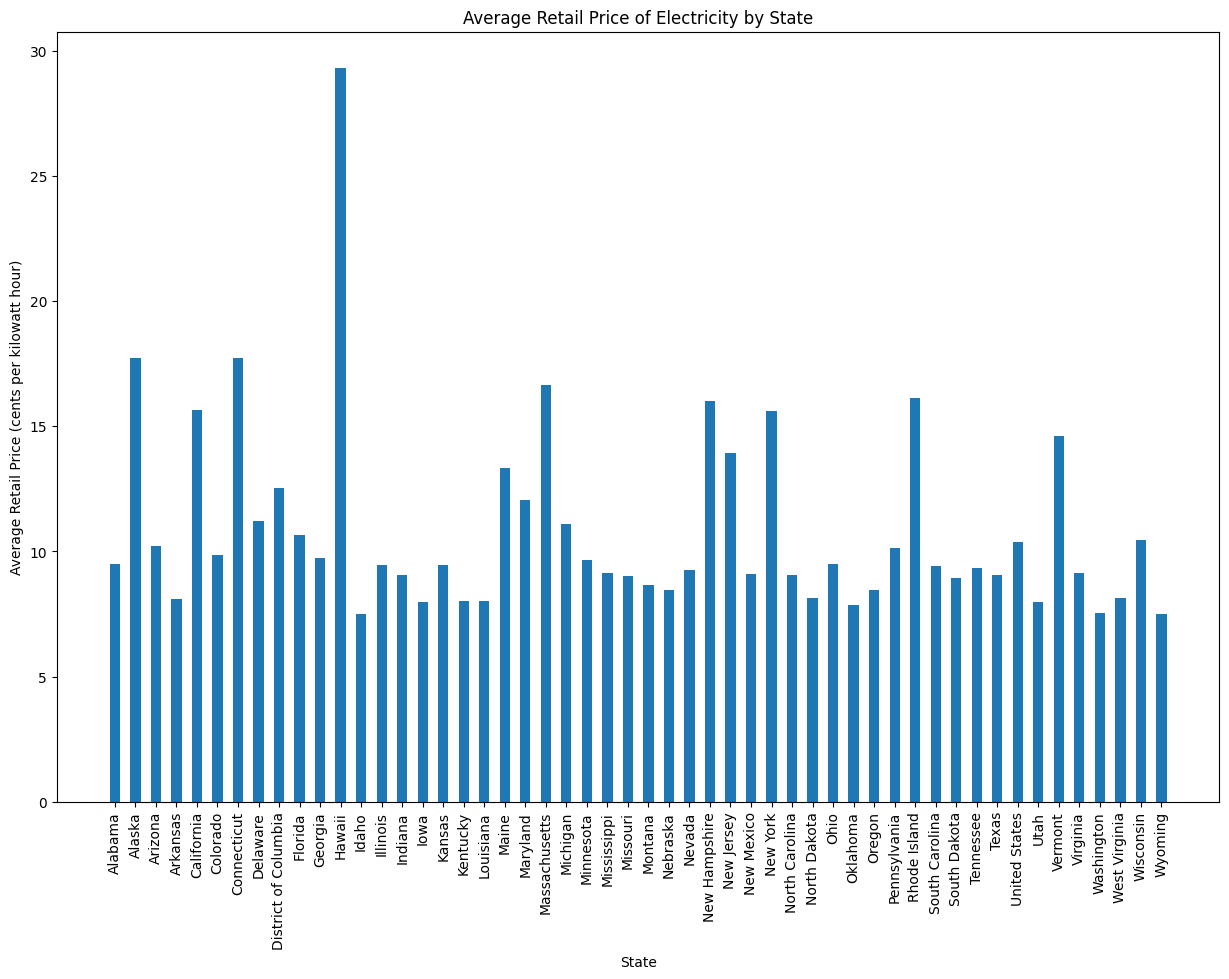

In [310]:
# increase size of chart to fit all data
plt.figure(figsize=(15, 10))

# create chart
plt.bar(state_avg_table["State"], price_avg, width=0.5, align='center')

# title and label axes 
plt.title("Average Retail Price of Electricity by State")
plt.xlabel("State")
plt.ylabel("Average Retail Price (cents per kilowatt hour)")

# adjust features
plt.xticks(rotation = 90)

# display 
plt.show()

Carbon Dioxide Emissions by State

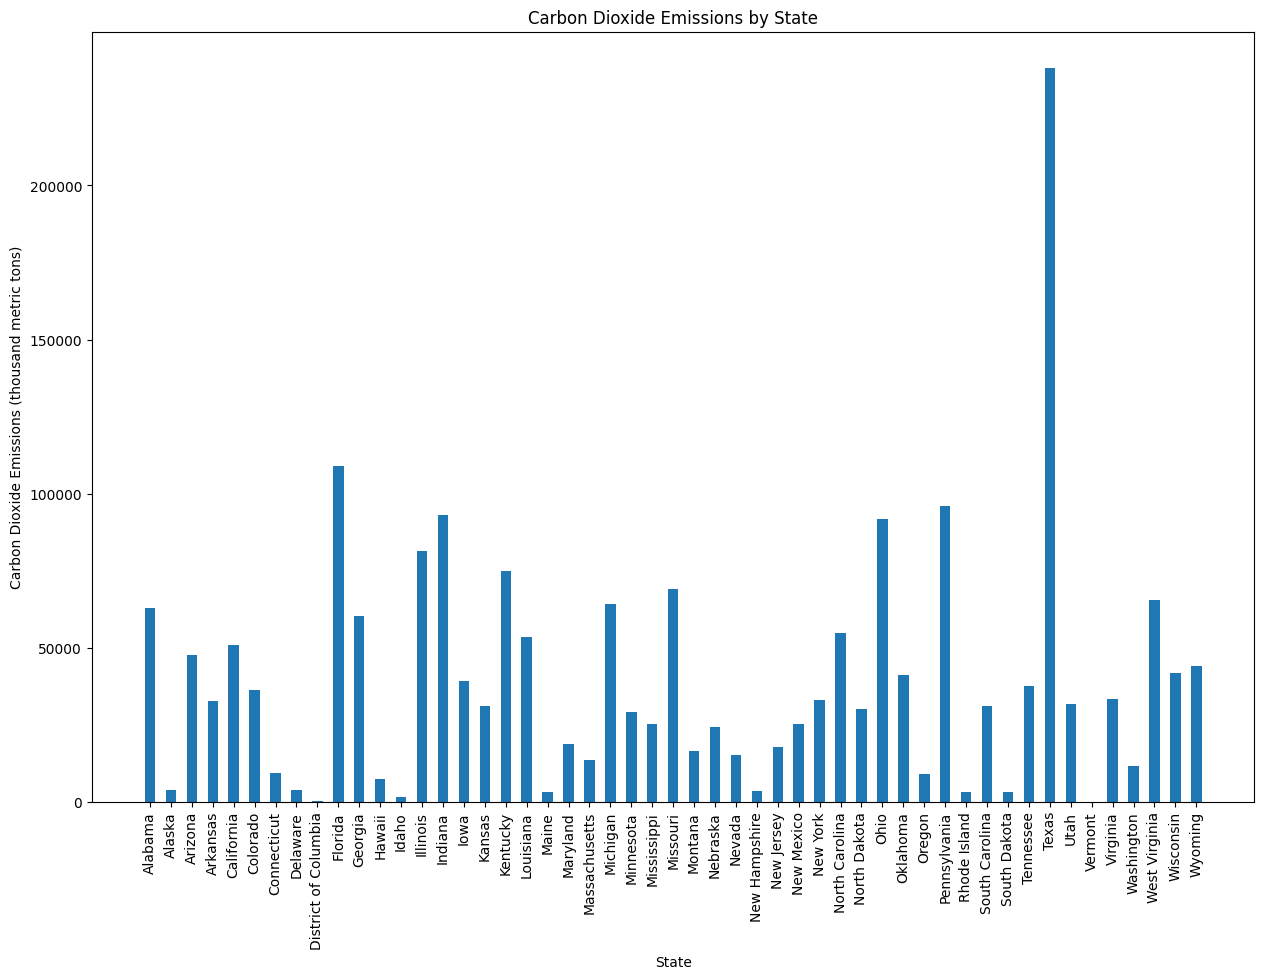

In [313]:
state_avg_filtered = state_avg_table[state_avg_table['State'] != 'United States'] # filter out 'United States' (doesn't make sense here)

# increase size of chart to fit all data
plt.figure(figsize=(15, 10))

# create chart
plt.bar(state_avg_filtered["State"], state_avg_filtered["Average Carbon Dioxide Emissions (thousand metric tons)"], width=0.5, align='center')

# title and label axes 
plt.title("Carbon Dioxide Emissions by State")
plt.xlabel("State")
plt.ylabel("Carbon Dioxide Emissions (thousand metric tons)")

# adjust features
plt.xticks(rotation = 90)

# display 
plt.show()

**Top 10 Tables**

Top 10 Most Expensive States (by Average Retail Price of Electricity)

In [316]:
columns = ['State', 'Average Retail Price (cents/kWh)', 'Average Carbon Dioxide Emissions (thousand metric tons)']
data = state_avg_table[columns]

data_sorted = data.sort_values(by='Average Retail Price (cents/kWh)', ascending = False) # sort descending

top_10_expensive = data_sorted.head(10).reset_index(drop = True) # choose top 10

top_10_expensive.index += 1 # start from 1

top_10_expensive # display

,State,Average Retail Price (cents/kWh),Average Carbon Dioxide Emissions (thousand metric tons)
1,Hawaii,29.294667,7476.133333
2,Connecticut,17.734000,9170.133333
3,Alaska,17.714667,3790.733333
4,Massachusetts,16.641333,13540.333333
5,Rhode Island,16.121333,3101.400000
6,New Hampshire,16.006000,3533.133333
7,California,15.662000,50926.733333
8,New York,15.601333,33039.400000
9,Vermont,14.609333,11.600000
10,New Jersey,13.920000,17637.600000


Top 10 Cheapest States (by Average Retail Price of Electricity)

In [317]:
columns = ['State', 'Average Retail Price (cents/kWh)', 'Average Carbon Dioxide Emissions (thousand metric tons)']
data = state_avg_table[columns]

data_sorted = data.sort_values(by='Average Retail Price (cents/kWh)', ascending = True) # sort ascending

top_10_cheapest = data_sorted.head(10).reset_index(drop = True) # choose top 10

top_10_cheapest.index += 1 # start from 1

top_10_cheapest # display

,State,Average Retail Price (cents/kWh),Average Carbon Dioxide Emissions (thousand metric tons)
1,Wyoming,7.494667,43994.533333
2,Idaho,7.517333,1686.066667
3,Washington,7.528667,11559.200000
4,Oklahoma,7.839286,41062.571429
5,Utah,7.959333,31833.866667
6,Iowa,7.996364,39102.909091
7,Louisiana,8.004667,53456.600000
8,Kentucky,8.016667,74728.133333
9,Arkansas,8.082667,32716.600000
10,West Virginia,8.130000,65412.333333


Top 10 Most Polluting States (by Average Carbon Dioxide Emissions)

In [320]:
columns = ['State', 'Average Retail Price (cents/kWh)', 'Average Carbon Dioxide Emissions (thousand metric tons)']
data = state_avg_table[columns]

data_filtered = data[data['State'] != 'United States']  # remove 'United States'

data_sorted = data_filtered.sort_values(by='Average Carbon Dioxide Emissions (thousand metric tons)', ascending = False) # sort descending

top_10_polluting = data_sorted.head(10).reset_index(drop = True) # choose top 10

top_10_polluting.index += 1 # start from 1

top_10_polluting # display

,State,Average Retail Price (cents/kWh),Average Carbon Dioxide Emissions (thousand metric tons)
1,Texas,9.039333,237986.333333
2,Florida,10.644667,108791.000000
3,Pennsylvania,10.117333,96071.333333
4,Indiana,9.070000,93170.933333
5,Ohio,9.510000,91625.800000
6,Illinois,9.450667,81270.266667
7,Kentucky,8.016667,74728.133333
8,Missouri,9.036000,69045.066667
9,West Virginia,8.130000,65412.333333
10,Michigan,11.081333,64250.266667


Top 10 Least Polluting States (by Average Carbon Dioxide Emissions)

In [321]:
columns = ['State', 'Average Retail Price (cents/kWh)', 'Average Carbon Dioxide Emissions (thousand metric tons)']
data = state_avg_table[columns]

data_filtered = data[data['State'] != 'United States']  # remove 'United States'

data_sorted = data_filtered.sort_values(by='Average Carbon Dioxide Emissions (thousand metric tons)', ascending = True) # sort descending

top_10_least_polluting = data_sorted.head(10).reset_index(drop = True) # choose top 10

top_10_least_polluting.index += 1 # start from 1

top_10_least_polluting # display

,State,Average Retail Price (cents/kWh),Average Carbon Dioxide Emissions (thousand metric tons)
1,Vermont,14.609333,11.600000
2,District of Columbia,12.528667,79.533333
3,Idaho,7.517333,1686.066667
4,South Dakota,8.933846,3027.076923
5,Rhode Island,16.121333,3101.400000
6,Maine,13.312000,3244.266667
7,New Hampshire,16.006000,3533.133333
8,Alaska,17.714667,3790.733333
9,Delaware,11.201333,3904.933333
10,Hawaii,29.294667,7476.133333
